Questions:
Answer these questions with graphs and tables and paste your coding here.

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
PATH = 'Startups.csv'
DEPENDENT = 'Profit'

In [3]:
ds = pd.read_csv(PATH)

In [4]:
ds.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### 1. Show datatype for each variable and summary of the variables?

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### 2. Show the descriptive statistic for the data frame?

In [6]:
ds.describe().round(2)

,R&D Spend,Administration,Marketing Spend,Profit
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


#### 3. Create histogram and boxplot for independent variables to understand the distribution and skewness (mention which one has right or left skewness or has normal distribution)?

In [7]:
names = list(ds.columns)
names.remove(DEPENDENT)

In [43]:
def plotHist(ds, col_name, bins=10):
    if ds[col_name].dtypes not in [np.single, np.double, int]:
        return
    
    counts, bins = np.histogram(ds[col_name], bins=bins)
    plt.hist(bins[:-1], bins, weights=counts)
    plt.xlabel(f"{col_name}")
    plt.title(f"{col_name} Variable Histogram")
    plt.show()

def plotBox(ds, col_name):
    if ds[col_name].dtypes not in [np.single, np.double, int]:
        return
    plt.boxplot(ds[col_name], vert=False)
    plt.xlabel(f"{col_name}")
    plt.title(f"{col_name} Variable Boxplot")
    plt.show()

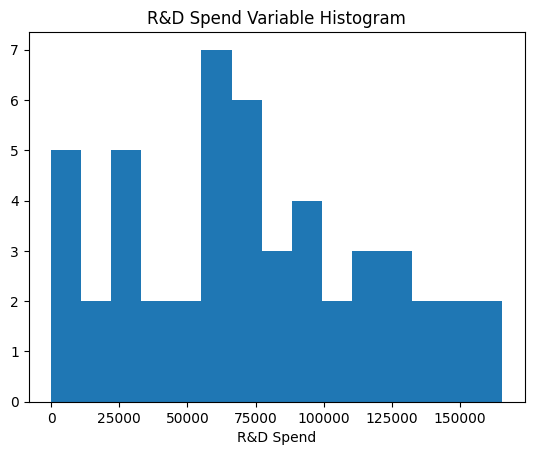

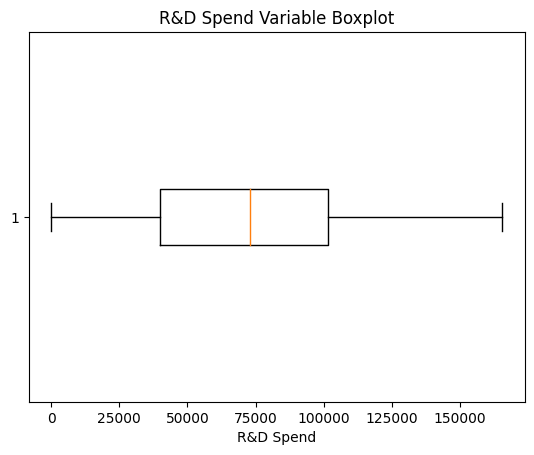

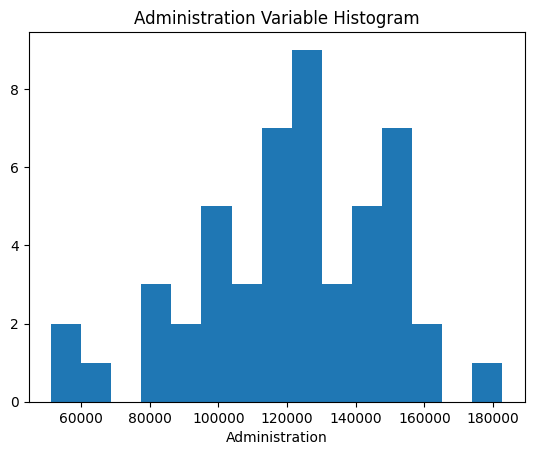

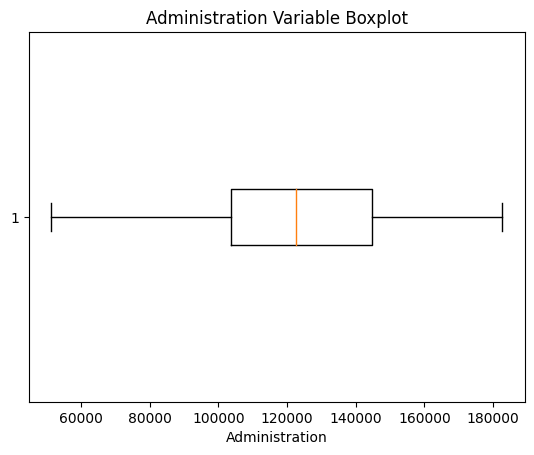

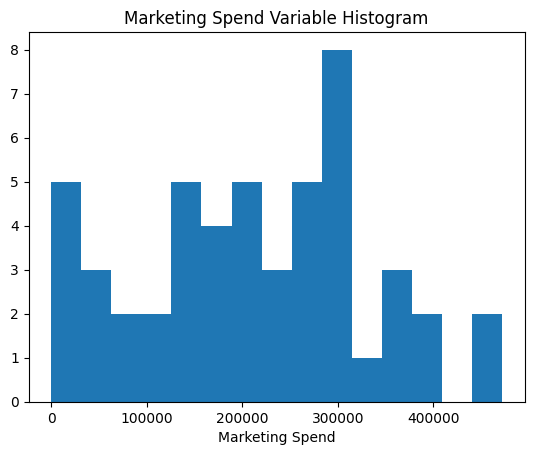

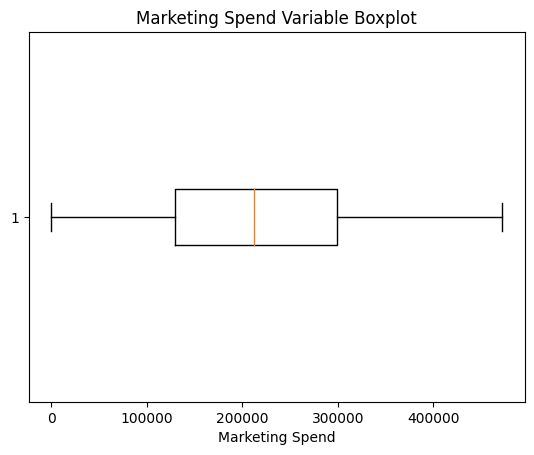

In [44]:
for name in names:
    plotHist(ds,name,15)
    plotBox(ds,name)

#### From the graphs:
- **R&D Spend** seems to have a slight **right skew**, but is almost normal. This is determined because the line the box plot is slightly to the right.
- **Administration** from the box and the hist, seems to have a clear **left skew**
- **Marketing Spend** is the closest to **approx normal** of the 3 quantitative, independent variables, but does seem to have a slight **left skew** from the box plot

#### 4. Which one of independent variables has the highest variability?

In [10]:
def dsrange(ds, col_name):
    return ds[col_name].max() - ds[col_name].min()
    
def dsIQR(ds, col_name):
    return ds[col_name].quantile(0.75) - ds[col_name].quantile(0.25)    

In [11]:
variability_stats = np.array([[dsrange(ds, name), dsIQR(ds, name), ds[name].std()] for name in names[:-1]])
variability_stats = variability_stats.T
variability_df = pd.DataFrame(variability_stats, columns=names[:-1]).set_axis(['Range', 'IQR', 'STD'], axis=0)
variability_df.round(3)

,R&D Spend,Administration,Marketing Spend
Range,165349.200,131362.420,471784.100
IQR,61666.430,41111.305,170168.952
STD,45902.256,28017.803,122290.311


By every metric, the **Marketing Spend** has the most variability among it's data points

#### 5. Which one of these independent variables is positively correlated with dependent variables?

In [22]:
corrs = dict(zip(names,ds.corr()[DEPENDENT][:-1])) # default corr method for pandas is pearson standard correlation coefficient
def varCorr(ds, col_name):
    plt.scatter(ds[col_name], ds[DEPENDENT])
    plt.title(f"{col_name} vs. {DEPENDENT}")
    plt.xlabel(f"{col_name}")
    plt.ylabel(f"{DEPENDENT}")
    plt.legend([f"Pearson Corr. Coeff: {np.double(corrs[col_name]).round(3)}"],loc= "lower right")
    plt.show()

C:\Users\TBWoo\AppData\Local\Temp\ipykernel_18772\2066611329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = dict(zip(names,ds.corr()[DEPENDENT][:-1])) # default corr method for pandas is pearson standard correlation coefficient


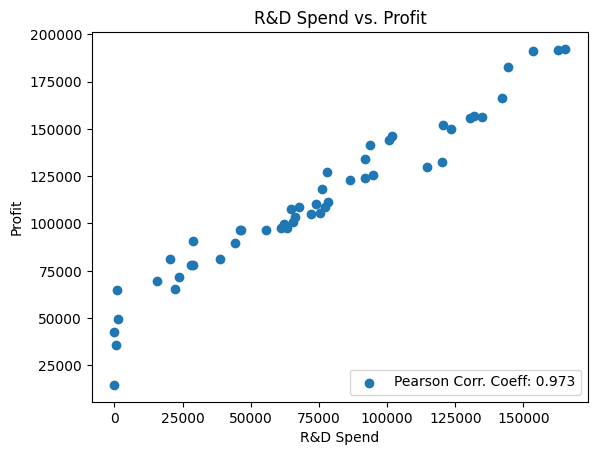

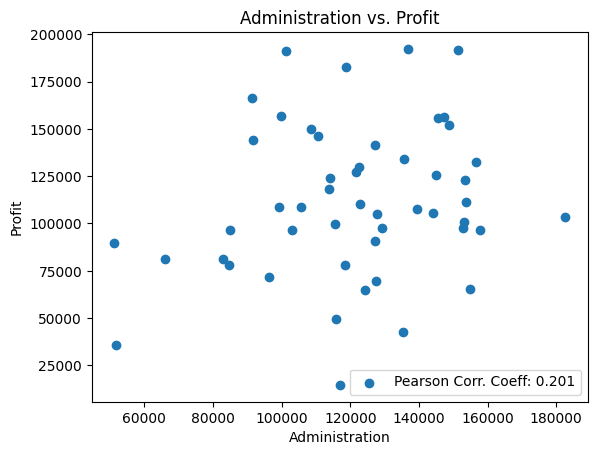

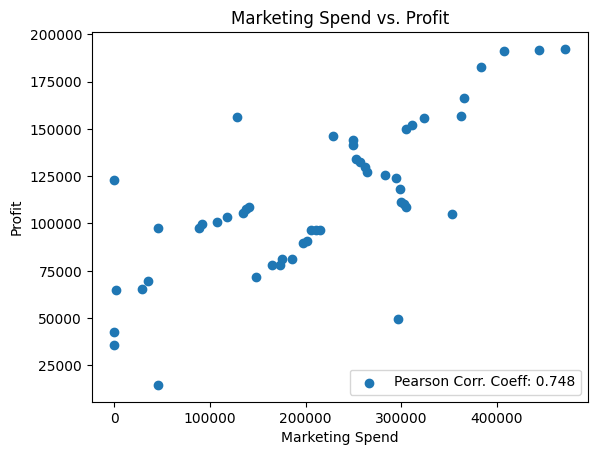

In [23]:
for name in names[:-1]:
    varCorr(ds,name)

Above are the scatter plots accompianed by the correlation coefficient between each quantitative explanatory variable and the response variable, "Profit". **R&D spend** is most **highly correlated** with profit; however, **every variable** has at least some **general positive correlation** trend.

#### 6. Which one of the States has highest profit?

In [17]:
print(f"Using pandas boolean indexer, we can find that the state with the highest profit\
 is: {list(ds[ds['Profit'] == ds['Profit'].max()]['State'])[0]}.")

Using pandas boolean indexer, we can find that the state with the highest profit is: New York.


#### 7. Will a company that spends more on marketing perform better (higher profit) or a company spends less on marketing?

As shown by the scatter plot and correlation coefficient: a company that spends more on **marketing** is likely to see **greater profits**. However, as shown by the pairplot below: an **increase in marketing spending** seems to also often **correlate to higher spending in R&D**, which is a much more correlated variable to the response, **Profit**.

#### 8. Create pairwise comparison graph.

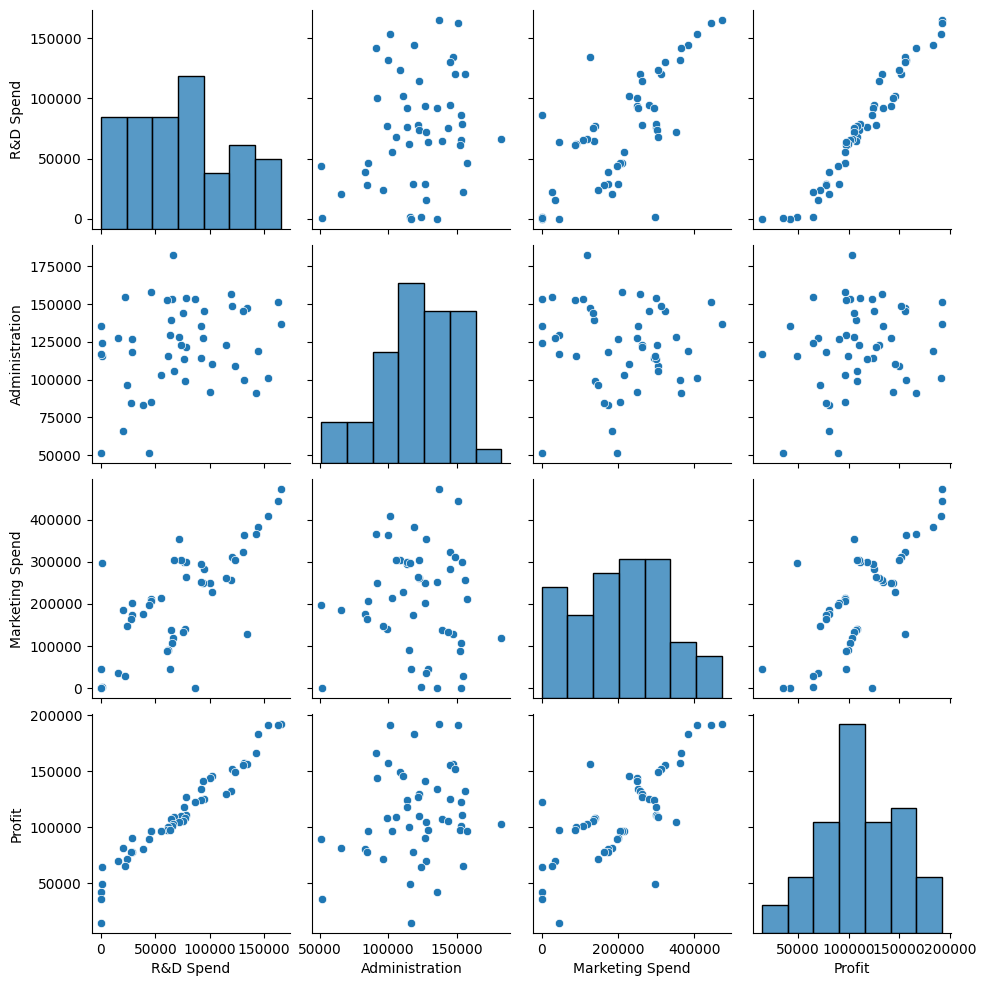

In [47]:
sns.pairplot(ds)